In [9]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn.apionly as sns 
sns.set_context("notebook") # can set to poster to make really large

In [10]:
data = pd.read_csv('df_by_playlist.csv',index_col=0)

from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(data.drop('followers',axis=1),data['followers'],test_size=0.2)

In [11]:
names = list(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence', 'explicit', 'mode', 'num_tracks',
       'track_feat', 'track_remast', 'track_remix', 'album_feat',
       'album_deluxe', 'album_best', 'time_sign_0.0', 'time_sign_3.0',
       'time_sign_4.0', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0',
       'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0','key_11.0'])

quant_predictors = list([predictor for predictor in names if xtrain.loc[:,predictor].unique().sum()!=1])

def interact(x,variable,predictors=quant_predictors):
    for predictor in predictors:
        x[variable+'_'+predictor] = x[variable]*x[predictor]
    return x

In [12]:
xtrain = interact(xtrain,'loudness')
xtrain = interact(xtrain,'danceability',list(['speechiness','tempo']))
xtest = interact(xtest,'loudness')
xtest = interact(xtest,'danceability',list(['speechiness','tempo']))

In [13]:
ytrain = np.log(ytrain+1)
ytest = np.log(ytest+1)

In [14]:
xtrain.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,...,loudness_instrumentalness,loudness_liveness,loudness_loudness,loudness_popularity,loudness_speechiness,loudness_tempo,loudness_valence,loudness_num_tracks,danceability_speechiness,danceability_tempo
playlist_name,,,,,,,,,,,,,,,,,,,,,
The Lectures of Joseph Campbell,0.871980,0.649690,212280.560000,0.315087,0.001768,0.214710,-17.873220,6.150000,0.898750,99.266430,...,-0.031607,-3.837559,319.451993,-109.920303,-16.063556,-1774.210742,-6.084080,-1787.322,0.583909,64.492407
Sleep,0.920579,0.288355,186652.980000,0.078688,0.869375,0.110317,-23.561450,60.180000,0.046629,88.372330,...,-20.483736,-2.599228,555.141926,-1417.928061,-1.098647,-2082.180235,-3.203556,-2356.145,0.013446,25.482603
2003,0.193680,0.673520,251759.840000,0.671180,0.012667,0.181948,-5.754480,46.180000,0.166854,112.956280,...,-0.072893,-1.047016,33.114040,-265.741886,-0.960158,-650.004654,-3.400587,-287.724,0.112380,76.078314
Eurovision Party,0.181191,0.611600,179348.800000,0.789975,0.000707,0.189103,-6.348725,26.925000,0.059615,126.636725,...,-0.004491,-1.200560,40.306309,-170.939421,-0.378479,-803.981742,-4.321418,-253.949,0.036461,77.451021
This Is: George Harrison,0.283704,0.541136,237203.045455,0.675568,0.016738,0.219336,-8.430932,27.727273,0.037395,122.892205,...,-0.141115,-1.849210,71.080611,-233.766746,-0.315279,-1036.095798,-5.082894,-370.961,0.020236,66.501441


In [15]:
xtrain.keys()

Index(['acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'liveness', 'loudness', 'popularity', 'speechiness',
       'tempo', 'valence', 'explicit', 'mode', 'pop', 'rock', 'folk', 'mellow',
       'indie', 'rap', 'house', 'r&b', 'stomp and holler', 'singer-songwriter',
       'edm', 'quiet storm', 'contemporary', 'christmas', 'funk', 'metal',
       'alternative', 'adult standards', 'americana', 'soul', 'blues',
       'hip hop', 'motown', 'punk', 'disco', 'other', 'num_tracks',
       'track_feat', 'track_remast', 'track_remix', 'album_feat',
       'album_deluxe', 'album_best', 'time_sign_0.0', 'time_sign_3.0',
       'time_sign_4.0', 'key_0.0', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0',
       'key_5.0', 'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0',
       'key_11.0', 'loudness_acousticness', 'loudness_danceability',
       'loudness_duration_ms', 'loudness_energy', 'loudness_instrumentalness',
       'loudness_liveness', 'loudness_loudne

In [22]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(xtrain)
xtrain = pd.DataFrame(scaler.transform(xtrain),columns = list(xtrain.keys().values),index = list(xtrain.index.values))
xtest = pd.DataFrame(scaler.transform(xtest),columns = list(xtest.keys().values),index = list(xtest.index.values))
xtrain.head()

,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,popularity,speechiness,tempo,...,loudness_instrumentalness,loudness_liveness,loudness_loudness,loudness_popularity,loudness_speechiness,loudness_tempo,loudness_valence,loudness_num_tracks,danceability_speechiness,danceability_tempo
The Lectures of Joseph Campbell,1.914326,0.805940,-0.300561,-1.209740,-0.626113,0.290127,-1.551005,-1.993858,4.752811,-1.784655,...,0.449048,-1.501279,1.231407,1.095162,-4.519393,-1.328513,-1.151351,-2.861372,4.933435,-0.074184
Sleep,2.089945,-2.184922,-0.455233,-2.280749,3.213206,-1.117550,-2.617642,1.385599,-0.410845,-2.802392,...,-4.172286,-0.578311,2.691203,-5.411374,0.088922,-1.933060,0.426598,-4.148069,-0.516315,-2.620248
2003,-0.536803,1.003187,-0.062288,0.403546,-0.577884,-0.151649,0.721459,0.509930,0.317690,-0.505737,...,0.439719,0.578602,-0.542088,0.320045,0.131568,0.878313,0.318665,0.530772,0.428819,0.681996
Eurovision Party,-0.581934,0.490659,-0.499317,0.941749,-0.630808,-0.055174,0.610028,-0.694427,-0.332153,0.772302,...,0.455175,0.464161,-0.497541,0.791629,0.310691,0.576055,-0.185766,0.607172,-0.296450,0.771589
This Is: George Harrison,-0.211490,-0.092586,-0.150144,0.423427,-0.559870,0.352511,0.219580,-0.644247,-0.466799,0.422486,...,0.424303,-0.019299,-0.306934,0.479102,0.330153,0.120413,-0.602902,0.342487,-0.451446,0.056940


In [31]:
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [34]:
param_grid = {'alpha': [0.1,0.01,0.001,0.0001,0.00001]}

mlp = MLPRegressor(random_state=2,tol=0.001,max_iter=500) 
mlp_cv = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1)
mlp_cv.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'alpha': [0.1, 0.01, 0.001, 0.0001, 1e-05]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [35]:
mlp_cv.best_estimator_

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [36]:
print('Best Params: \n',mlp_cv.best_params_)
print('Score: ',mlp_cv.score(xtrain, ytrain))
print('MSE: ',mean_squared_error(ytrain, mlp_cv.predict(xtrain)))
print('MAE: ',mean_absolute_error(ytrain, mlp_cv.predict(xtrain)))

Best Params: 
 {'alpha': 0.1}
Score:  0.84074692516
MSE:  1.43764742696
MAE:  0.867827868439


### Adjusting other params

1. Number of hidden layers
2. Number of perceptrons in each layer
3. activation function?

In [45]:
param_grid = {'activation': ['identity','logistic','tanh','relu'],
             'alpha': [0.1,0.01],
             'hidden_layer_sizes': [(50,),(100,),(200,)]}

mlp2 = MLPRegressor(random_state=2,tol=0.001,max_iter=1000,alpha=0.1) 
mlp2_cv = GridSearchCV(mlp2, param_grid, cv=5, n_jobs=-1)
mlp2_cv.fit(xtrain, ytrain)

GridSearchCV(cv=5, error_score='raise',
       estimator=MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=2, shuffle=True,
       solver='adam', tol=0.001, validation_fraction=0.1, verbose=False,
       warm_start=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'activation': ['identity', 'logistic', 'tanh', 'relu'], 'alpha': [0.1, 0.01], 'hidden_layer_sizes': [(50,), (100,), (200,)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring=None, verbose=0)

In [46]:
print('Best Params: \n',mlp2_cv.best_params_)
print('Score: ',mlp2_cv.score(xtrain, ytrain))
print('MSE: ',mean_squared_error(ytrain, mlp2_cv.predict(xtrain)))
print('MAE: ',mean_absolute_error(ytrain, mlp2_cv.predict(xtrain)))

Best Params: 
 {'activation': 'logistic', 'alpha': 0.1, 'hidden_layer_sizes': (200,)}
Score:  0.533832015869
MSE:  4.20830306472
MAE:  1.57756670999


### Model evaluation

In [48]:
print('Score: ',mlp2_cv.score(xtest, ytest))
print('MSE: ',mean_squared_error(ytest, mlp2_cv.predict(xtest)))
print('MAE: ',mean_absolute_error(ytest, mlp2_cv.predict(xtest)))

Score:  0.405613542171
MSE:  5.41742503
MAE:  1.73443639241


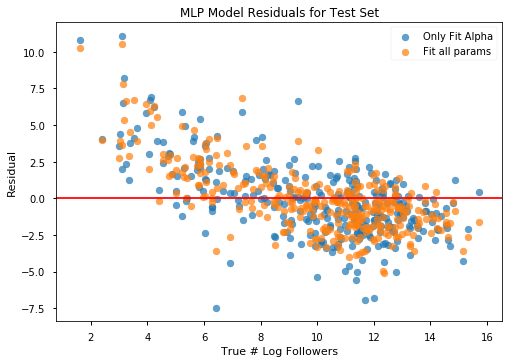

In [50]:
plt.scatter(ytest, mlp_cv.predict(xtest)-ytest,alpha=0.7,label='Only Fit Alpha')
plt.scatter(ytest, mlp2_cv.predict(xtest)-ytest,alpha=0.7,label='Fit all params')
plt.axhline(c='red')
plt.xlabel('True # Log Followers')
plt.ylabel('Residual')
plt.title('MLP Model Residuals for Test Set')
plt.legend();